In [1]:
import numpy as np
import seaborn as sns
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
import torchdeepretina as tdr
import tqdm
from matplotlib.ticker import MultipleLocator

f2_response is unavailable until you run:
$ pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

In [3]:
prepath = "/home/grantsrb/src/torch-deep-retina/training_scripts/"
intr_types = {"bipolar", "amacrine", "unks"} #"unks"

In [4]:
path = os.path.join(prepath, "convgc_moreseeds/model_data.csv")
model_df = pd.read_csv(path, sep="!")
print("n_models:", len(model_df))
model_df = model_df[["save_folder", "test_acc"]] 
model_df["save_folder"] = model_df.apply(lambda x: ("./"+x.save_folder).split("/")[-1], axis=1)
model_df.head()

n_models: 30


,save_folder,test_acc
0,convgc_moreseeds_0_seed234561_dataset15-10-07_...,0.730271
1,convgc_moreseeds_1_seed345672_dataset15-10-07_...,0.726044
2,convgc_moreseeds_2_seed123456_dataset15-10-07_...,0.737751
3,convgc_moreseeds_3_seed456783_dataset15-10-07_...,0.731329
4,convgc_moreseeds_4_seed567894_dataset15-10-07_...,0.740887


In [5]:
sim_files = sorted(os.listdir("./csvs"))
for i,sim in enumerate(sim_files):
    print(i,sim)

0 convgc_bests_cors.csv
1 convgc_bests_intr_cors.csv
2 convgc_moreseeds_cors.csv
3 convgc_moreseeds_intr_cors.csv
4 linearstacked_101822_cors.csv


In [9]:
idxs = [2]

files = [sim_files[i] for i in idxs]
files

['convgc_moreseeds_cors.csv']

In [16]:
dfs = []
for i in range(len(files)):
    path = os.path.join("./csvs", files[i])
    df = pd.read_csv(path,sep="!")
    dfs.append(df)
og_cors = pd.concat(dfs).reset_index()
dups = ["cell_file", "cell_idx", "model1", "m1_layer", "chan1", "row1", "col1", "model2"]
og_cors = og_cors.sort_values(by="cor",ascending=False).drop_duplicates(dups)
og_cors = og_cors.loc[og_cors["cell_type"].isin(intr_types)]
og_cors = og_cors.loc[og_cors["model1"]!=og_cors["model2"]]
og_cors["model1"] = og_cors.apply(lambda x: ("./"+x.model1).split("/")[-1], axis=1)
og_cors["model2"] = og_cors.apply(lambda x: ("./"+x.model2).split("/")[-1], axis=1)
og_cors["prep1"] = og_cors["stim_type1"] + og_cors["dataset1"]
og_cors["prep2"] = og_cors["stim_type2"] + og_cors["dataset2"]
og_cors

,index,cell_file,cell_idx,cell_type,chan1,chan2,col1,col2,cor,dataset1,dataset2,intr_cor,m1_layer,m2_layer,model1,model2,row1,row2,seed1,seed2,stim_type1,stim_type2,prep1,prep2
25637,25637,amacrines_late_2012.h5,8,amacrine,2,2,18,18,0.998609,15-10-07,15-10-07,0.687125,sequential.0,sequential.0,convgc_moreseeds_9_seed567894_dataset15-10-07_...,convgc_moreseeds_6_seed456783_dataset15-10-07_...,18,18,567894,456783,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07
17492,17492,amacrines_late_2012.h5,12,amacrine,2,2,19,19,0.998599,15-10-07,15-10-07,0.603593,sequential.0,sequential.0,convgc_moreseeds_6_seed456783_dataset15-10-07_...,convgc_moreseeds_9_seed567894_dataset15-10-07_...,18,18,456783,567894,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07
17480,17480,amacrines_late_2012.h5,4,amacrine,2,2,24,24,0.998479,15-10-07,15-10-07,0.672125,sequential.0,sequential.0,convgc_moreseeds_6_seed456783_dataset15-10-07_...,convgc_moreseeds_9_seed567894_dataset15-10-07_...,21,21,456783,567894,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07
46291,46291,amacrines_early_2012.h5,4,amacrine,2,7,23,23,0.998384,15-11-21a,15-11-21a,0.727475,sequential.0,sequential.0,convgc_moreseeds_16_seed456783_dataset15-11-21...,convgc_moreseeds_19_seed567894_dataset15-11-21...,18,19,456783,567894,whitenoise,whitenoise,whitenoise15-11-21a,whitenoise15-11-21a
54453,54453,bipolars_late_2012.h5,2,bipolar,7,2,23,23,0.998342,15-11-21a,15-11-21a,0.728221,sequential.0,sequential.0,convgc_moreseeds_19_seed567894_dataset15-11-21...,convgc_moreseeds_16_seed456783_dataset15-11-21...,18,17,567894,456783,whitenoise,whitenoise,whitenoise15-11-21a,whitenoise15-11-21a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,82937,amacrines_late_2012.h5,13,amacrine,3,7,24,21,0.097246,15-11-21b,15-11-21b,0.618367,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,3,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b
82920,82920,amacrines_early_2012.h5,0,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.698895,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b
82935,82935,amacrines_late_2012.h5,8,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.619925,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b
82936,82936,amacrines_late_2012.h5,2,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.619389,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b


In [17]:
retina_map = {
    "15-10-07": 1,
    "15-11-21a": 2,
    "15-11-21b": 3,
}
marker_map = {
    "naturalscene": "o",
    "whitenoise": "X"
}
og_cors["\nRetina"] = og_cors.apply(lambda x: retina_map[x.dataset1], axis=1)
og_cors["\nStimulus Type"] = og_cors["stim_type1"]
og_cors["Retina"] = og_cors["\nRetina"]
og_cors["Stimulus Type"] = og_cors["\nStimulus Type"]

colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

2024
2244


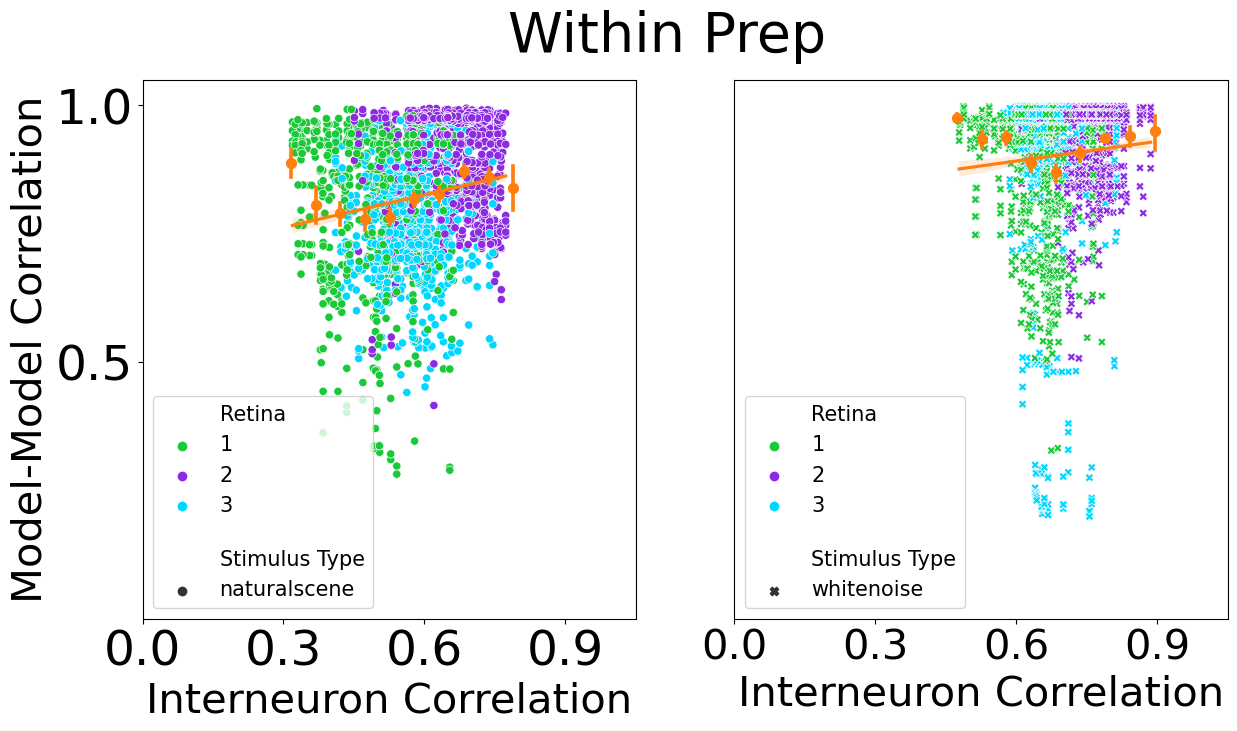

In [58]:
label_size = 30
plot_df = og_cors.loc[og_cors["prep1"]==og_cors["prep2"]]
n_bins = 20
reg_color = sns.color_palette()[1]

fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = plot_df.loc[(plot_df["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("Model-Model Correlation", fontsize=label_size)
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = plot_df.loc[(plot_df["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("")
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=30)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.suptitle("Within Prep", fontsize=40)
plt.show()

12650
14025


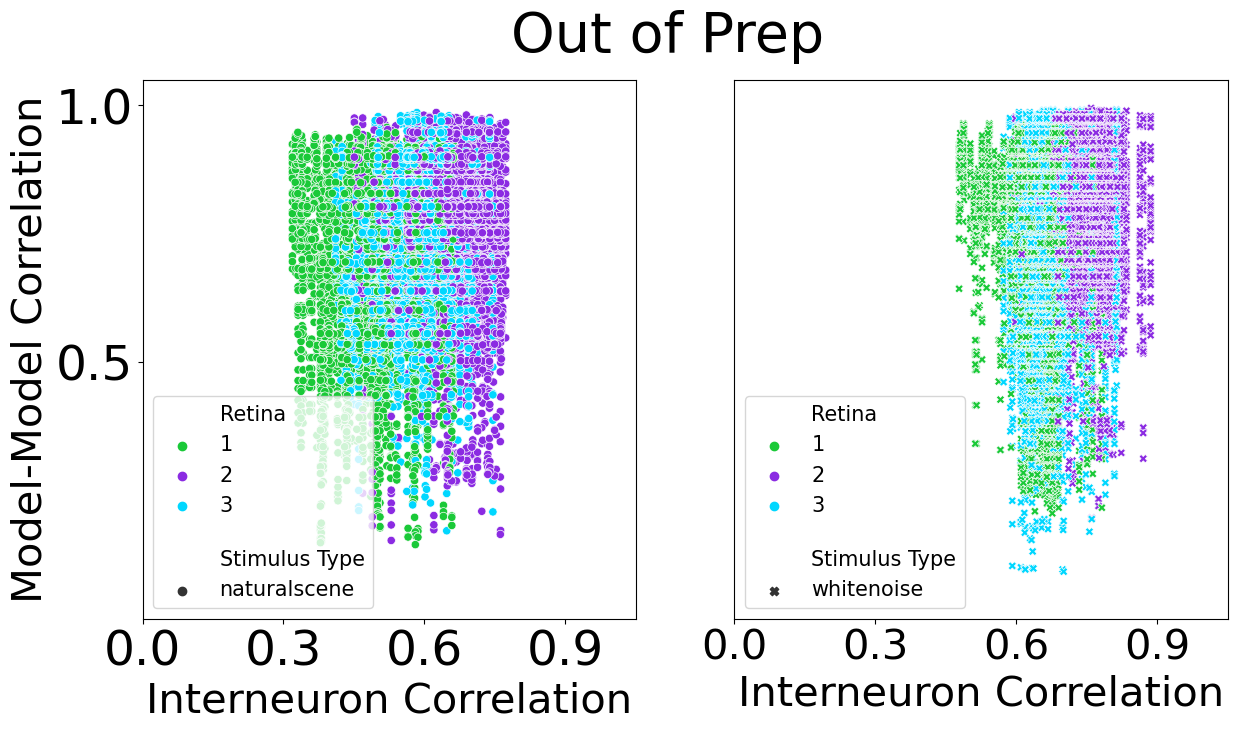

In [27]:
label_size = 30
plot_df = og_cors.loc[og_cors["prep1"]!=og_cors["prep2"]]

fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = plot_df.loc[(plot_df["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("Model-Model Correlation", fontsize=label_size)
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = plot_df.loc[(plot_df["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("")
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=30)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.suptitle("Out of Prep", fontsize=40)
plt.show()

# Average Over Models

In [28]:
og_cors

,index,cell_file,cell_idx,cell_type,chan1,chan2,col1,col2,cor,dataset1,dataset2,intr_cor,m1_layer,m2_layer,model1,model2,row1,row2,seed1,seed2,stim_type1,stim_type2,prep1,prep2,\nRetina,\nStimulus Type,Retina,Stimulus Type
25637,25637,amacrines_late_2012.h5,8,amacrine,2,2,18,18,0.998609,15-10-07,15-10-07,0.687125,sequential.0,sequential.0,convgc_moreseeds_9_seed567894_dataset15-10-07_...,convgc_moreseeds_6_seed456783_dataset15-10-07_...,18,18,567894,456783,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07,1,whitenoise,1,whitenoise
17492,17492,amacrines_late_2012.h5,12,amacrine,2,2,19,19,0.998599,15-10-07,15-10-07,0.603593,sequential.0,sequential.0,convgc_moreseeds_6_seed456783_dataset15-10-07_...,convgc_moreseeds_9_seed567894_dataset15-10-07_...,18,18,456783,567894,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07,1,whitenoise,1,whitenoise
17480,17480,amacrines_late_2012.h5,4,amacrine,2,2,24,24,0.998479,15-10-07,15-10-07,0.672125,sequential.0,sequential.0,convgc_moreseeds_6_seed456783_dataset15-10-07_...,convgc_moreseeds_9_seed567894_dataset15-10-07_...,21,21,456783,567894,whitenoise,whitenoise,whitenoise15-10-07,whitenoise15-10-07,1,whitenoise,1,whitenoise
46291,46291,amacrines_early_2012.h5,4,amacrine,2,7,23,23,0.998384,15-11-21a,15-11-21a,0.727475,sequential.0,sequential.0,convgc_moreseeds_16_seed456783_dataset15-11-21...,convgc_moreseeds_19_seed567894_dataset15-11-21...,18,19,456783,567894,whitenoise,whitenoise,whitenoise15-11-21a,whitenoise15-11-21a,2,whitenoise,2,whitenoise
54453,54453,bipolars_late_2012.h5,2,bipolar,7,2,23,23,0.998342,15-11-21a,15-11-21a,0.728221,sequential.0,sequential.0,convgc_moreseeds_19_seed567894_dataset15-11-21...,convgc_moreseeds_16_seed456783_dataset15-11-21...,18,17,567894,456783,whitenoise,whitenoise,whitenoise15-11-21a,whitenoise15-11-21a,2,whitenoise,2,whitenoise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82937,82937,amacrines_late_2012.h5,13,amacrine,3,7,24,21,0.097246,15-11-21b,15-11-21b,0.618367,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,3,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b,3,whitenoise,3,whitenoise
82920,82920,amacrines_early_2012.h5,0,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.698895,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b,3,whitenoise,3,whitenoise
82935,82935,amacrines_late_2012.h5,8,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.619925,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b,3,whitenoise,3,whitenoise
82936,82936,amacrines_late_2012.h5,2,amacrine,3,5,23,11,0.095958,15-11-21b,15-11-21b,0.619389,sequential.4,sequential.4,convgc_moreseeds_29_seed567894_dataset15-11-21...,convgc_moreseeds_22_seed123456_dataset15-11-21...,11,0,567894,123456,whitenoise,naturalscene,whitenoise15-11-21b,naturalscene15-11-21b,3,whitenoise,3,whitenoise


385
358


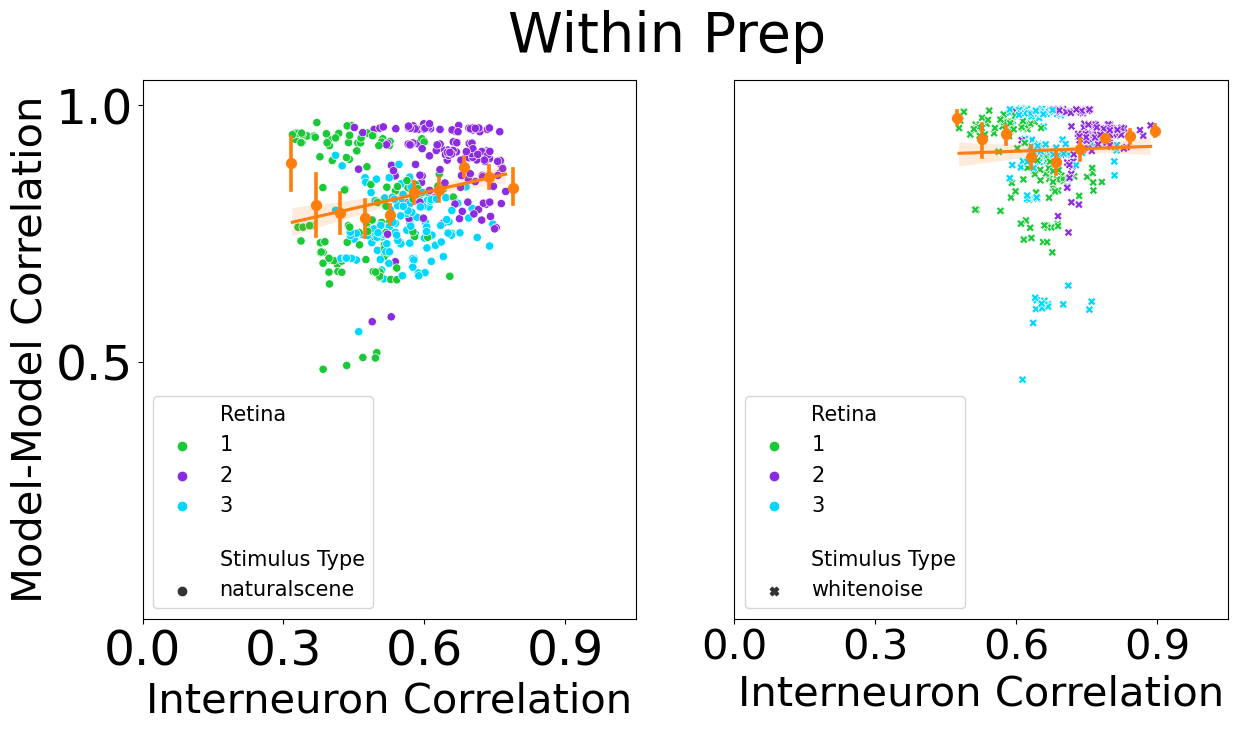

In [57]:
label_size = 30
plot_df = og_cors.loc[og_cors["prep1"]==og_cors["prep2"]]
groups = ["cell_file", "cell_idx", "model1"]
n_bins = 20
reg_color = sns.color_palette()[1]

fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = plot_df.loc[(plot_df["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("Model-Model Correlation", fontsize=label_size)
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = plot_df.loc[(plot_df["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("")
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=30)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.suptitle("Within Prep", fontsize=40)
plt.show()

In [55]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

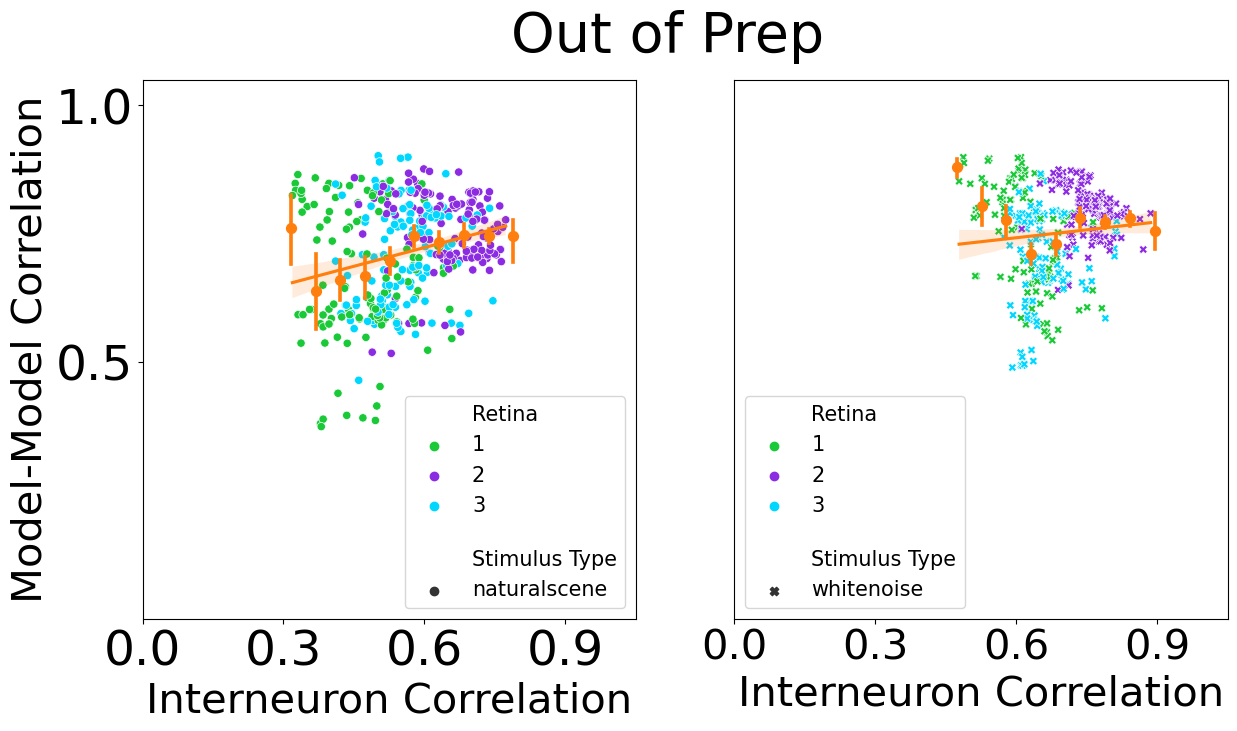

In [56]:
label_size = 30
n_bins = 20
reg_color = sns.color_palette()[1]
plot_df = og_cors.loc[og_cors["prep1"]!=og_cors["prep2"]]
groups = ["cell_file", "cell_idx", "model1"]

fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = plot_df.loc[(plot_df["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("Model-Model Correlation", fontsize=label_size)
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower right", fontsize=15)

ax = axs[1]
temp = plot_df.loc[(plot_df["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
sns.regplot(x="intr_cor", y="cor", data=temp, x_bins=np.linspace(0,1,n_bins), x_estimator=np.mean, ax=ax, color=reg_color)
ax.set_ylabel("")
ax.set_xlabel("Interneuron Correlation", fontsize=label_size)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,10,3)],fontsize=30)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.suptitle("Out of Prep", fontsize=40)
plt.show()

# Bins

In [32]:
def bin_mu_std(x, y, bins):
    """
    Calculates the mean and std of all y values into bins based on which bin the
    corresponding x value resides in
    
    Args:
        x: ndarray (N,)
            this will be used to determine which bin the corresponding y
            value falls into
        y: ndarray (N,)
            these are the values that will be averaged over
        bins: ndarray (nBins-1,)
            these are the values that mark the edges of bins.
    """
    mus = np.zeros(bins.shape[0]+1)
    stds = np.zeros(bins.shape[0]+1)
    mus[0] = y[x<=bins[0]].mean()
    stds[0] = y[x<=bins[0]].std()
    for i in range(mus.shape[0]-2):
        mus[ i+1] = y[(x>bins[i])&(x<=bins[i+1])].mean()
        stds[i+1] = y[(x>bins[i])&(x<=bins[i+1])].std()
    mus[-1] = y[x>bins[ -1]].mean()
    stds[-1] = y[x>bins[-1]].std()
    return mus, stds

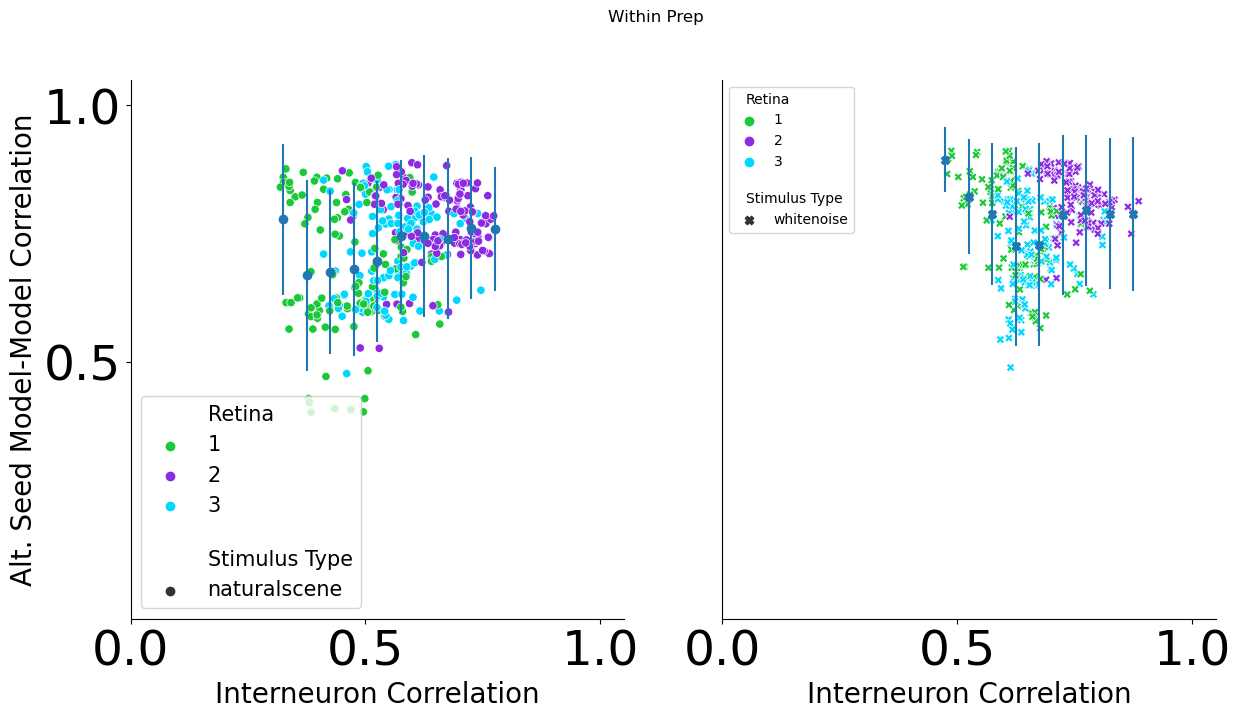

In [46]:
n_bins = 20
jitter = 0.01
bins = np.linspace(0,1,n_bins+1)[1:-1]
x_vals = np.linspace(0,1-bins[0],n_bins)+bins[0]/2
plot_df = og_cors.loc[og_cors["prep1"]==og_cors["prep2"]]
groups = ["cell_file", "cell_idx", "model1"]

temp = og_cors.loc[(og_cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
#temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
means, errs = bin_mu_std(temp["intr_cor"], temp["cor"], bins)

fig, axs = plt.subplots(1,2,figsize=(14,7))

ax = axs[0]
plt.sca(ax)
plt.errorbar(x_vals, means, yerr=errs, fmt='o')
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
ax.set_ylabel("Model-Model Correlation", fontsize=20)
ax.set_xlabel("Interneuron Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

temp = og_cors.loc[(og_cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
#temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
means, errs = bin_mu_std(temp["intr_cor"], temp["cor"], bins)

ax = axs[1]
plt.sca(ax)
plt.errorbar(x_vals, means, yerr=errs, fmt='X')
temp = temp.groupby(groups+["\nStimulus Type", "Retina"]).mean().reset_index()
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
##temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Interneuron Correlation", fontsize=20)

plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])

plt.suptitle("Within Prep")
plt.show()

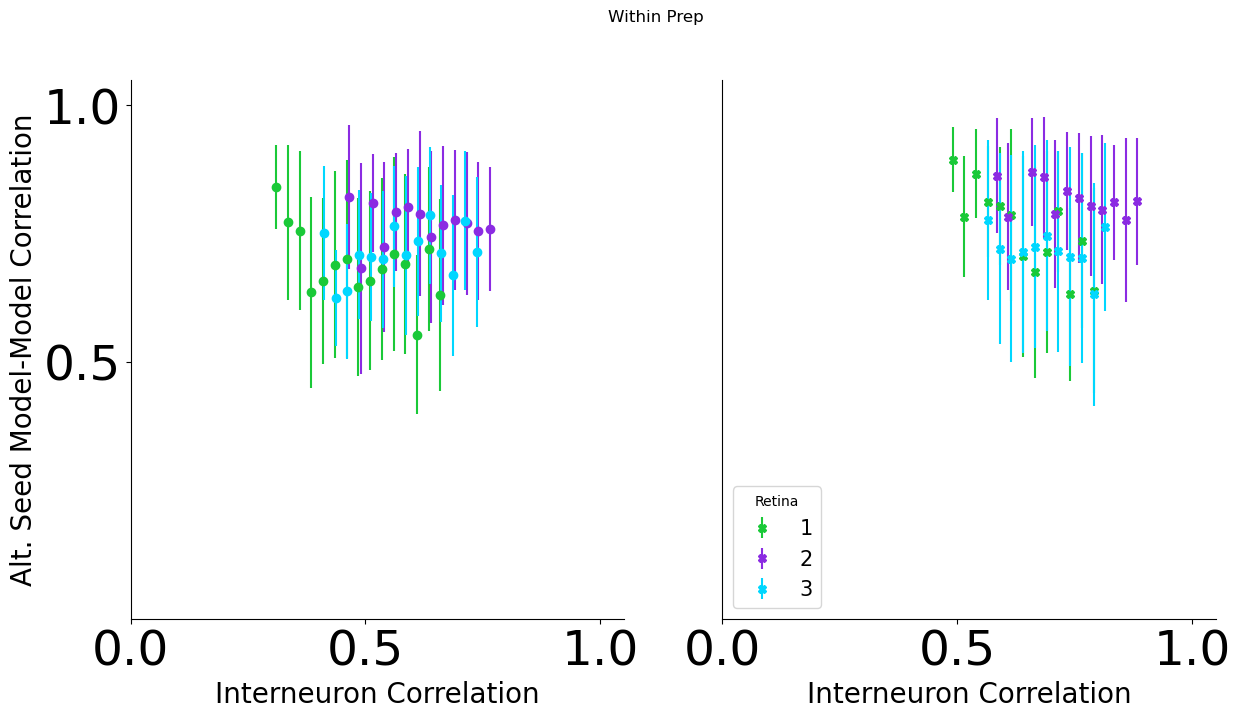

In [39]:
n_bins = 40
jitter = 0.01
bins = np.linspace(0,1,n_bins+1)[1:-1]
x_vals = np.linspace(0,1-bins[0],n_bins)+bins[0]/2
plot_df = og_cors.loc[og_cors["prep1"]==og_cors["prep2"]]

temp = og_cors.loc[(og_cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
means = dict()
errs = dict()
for retina in set(temp["Retina"]):
    t = temp.loc[temp["Retina"]==retina]
    mean, err = bin_mu_std(t["intr_cor"], t["cor"], bins)
    means[retina] = mean
    errs[retina] = err

fig, axs = plt.subplots(1,2,figsize=(14,7))

ax = axs[0]
plt.sca(ax)
for retina in means:
    x = x_vals + jitter*(np.random.random()-.5)
    plt.errorbar(x, means[retina], yerr=errs[retina], fmt='o', color=p[retina], label=retina)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Interneuron Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
#plt.legend(loc="lower left", fontsize=15)

temp = og_cors.loc[(og_cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
means = dict()
errs = dict()
for retina in set(temp["Retina"]):
    t = temp.loc[temp["Retina"]==retina]
    mean, err = bin_mu_std(t["intr_cor"], t["cor"], bins)
    means[retina] = mean
    errs[retina] = err

ax = axs[1]
plt.sca(ax)
for retina in means:
    x = x_vals + jitter*(np.random.random()-.5)
    plt.errorbar(x, means[retina], yerr=errs[retina], fmt='X', color=p[retina], label=retina)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
##temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Interneuron Correlation", fontsize=20)

plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(title="Retina", loc="lower left", fontsize=15)

plt.suptitle("Within Prep")
plt.show()

## Average Over Alt Seeds

In [47]:
groups = ["cell_file", "cell_idx", "cell_type", "model1", "dataset1", "stim_type1", "m1_layer", "chan1", "row1", "col1"]
cors = og_cors.groupby(groups).mean().reset_index()
cors

,cell_file,cell_idx,cell_type,model1,dataset1,stim_type1,m1_layer,chan1,row1,col1,index,chan2,col2,cor,intr_cor,row2,seed1,seed2,\nRetina,Retina
0,amacrines_early_2012.h5,0,amacrine,convgc_moreseeds_0_seed234561_dataset15-10-07_...,15-10-07,naturalscene,sequential.0,7,16,16,1387.137931,3.103448,19.965517,0.859953,0.325061,14.965517,234561.0,349504.655172,1.0,1.0
1,amacrines_early_2012.h5,0,amacrine,convgc_moreseeds_12_seed123456_dataset15-11-21...,15-11-21a,naturalscene,sequential.4,2,8,25,34820.586207,4.655172,22.724138,0.614030,0.594030,12.482759,123456.0,353335.862069,2.0,2.0
2,amacrines_early_2012.h5,0,amacrine,convgc_moreseeds_13_seed345672_dataset15-11-21...,15-11-21a,naturalscene,sequential.0,0,14,29,37571.344828,3.620690,25.413793,0.797079,0.595387,15.931034,345672.0,345673.241379,2.0,2.0
3,amacrines_early_2012.h5,0,amacrine,convgc_moreseeds_14_seed567894_dataset15-11-21...,15-11-21a,naturalscene,sequential.0,0,15,23,40358.448276,3.758621,20.586207,0.821051,0.565601,15.862069,567894.0,338010.413793,2.0,2.0
4,amacrines_early_2012.h5,0,amacrine,convgc_moreseeds_15_seed234561_dataset15-11-21...,15-11-21a,whitenoise,sequential.0,4,16,24,43116.379310,3.241379,21.862069,0.888138,0.754983,17.689655,234561.0,349504.655172,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,bipolars_late_2012.h5,3,bipolar,convgc_moreseeds_7_seed123456_dataset15-10-07_...,15-10-07,whitenoise,sequential.0,7,20,19,20855.827586,3.068966,22.206897,0.877407,0.594920,19.517241,123456.0,353335.862069,1.0,1.0
1063,bipolars_late_2012.h5,3,bipolar,convgc_moreseeds_8_seed345672_dataset15-10-07_...,15-10-07,whitenoise,sequential.0,4,17,22,23636.068966,3.275862,24.931034,0.863034,0.651685,15.137931,345672.0,345673.241379,1.0,1.0
1064,bipolars_late_2012.h5,3,bipolar,convgc_moreseeds_8_seed345672_dataset15-10-07_...,15-10-07,whitenoise,sequential.4,2,13,12,23686.551724,3.206897,19.172414,0.716194,0.651685,13.965517,345672.0,345673.241379,1.0,1.0
1065,bipolars_late_2012.h5,3,bipolar,convgc_moreseeds_9_seed567894_dataset15-10-07_...,15-10-07,whitenoise,sequential.0,3,16,20,26424.310345,4.310345,24.379310,0.682040,0.610308,14.689655,567894.0,338010.413793,1.0,1.0


In [48]:
cors["\nRetina"] = cors.apply(lambda x: retina_map[x.dataset1], axis=1)
cors["\nStimulus Type"] = cors["stim_type1"]
cors["Retina"] = cors["\nRetina"]
cors["Stimulus Type"] = cors["\nStimulus Type"]

colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

506
561


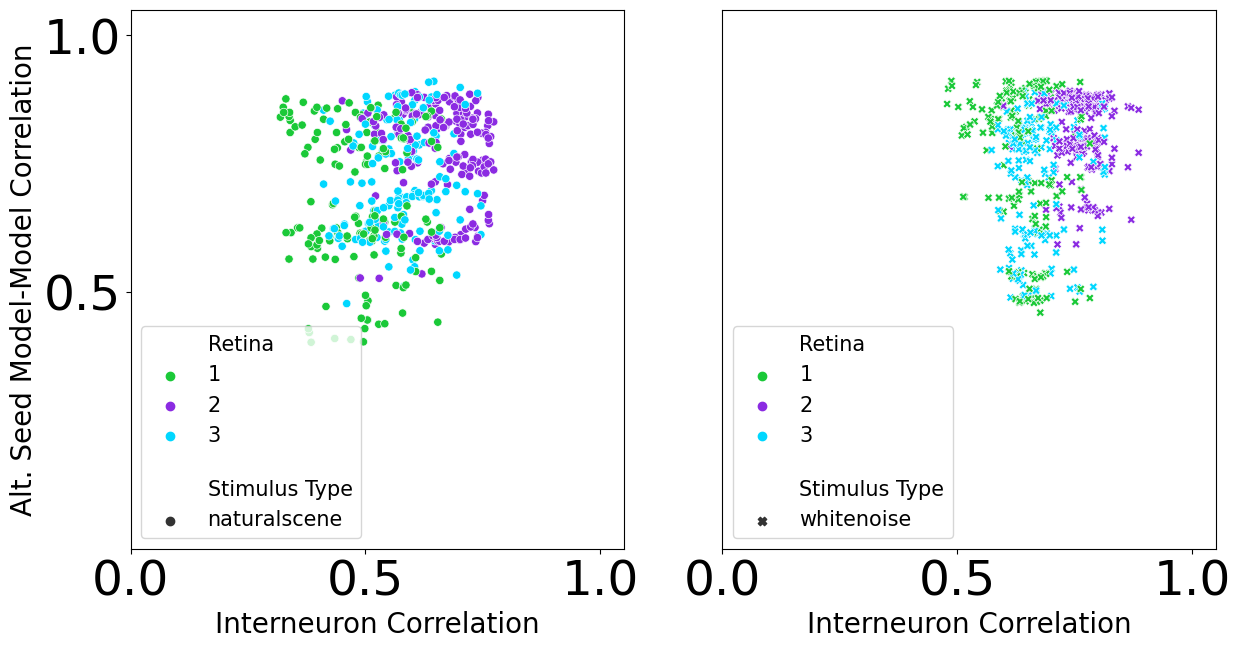

In [57]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = cors.loc[(cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Interneuron Correlation", fontsize=20)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = cors.loc[(cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Interneuron Correlation", fontsize=20)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.show()

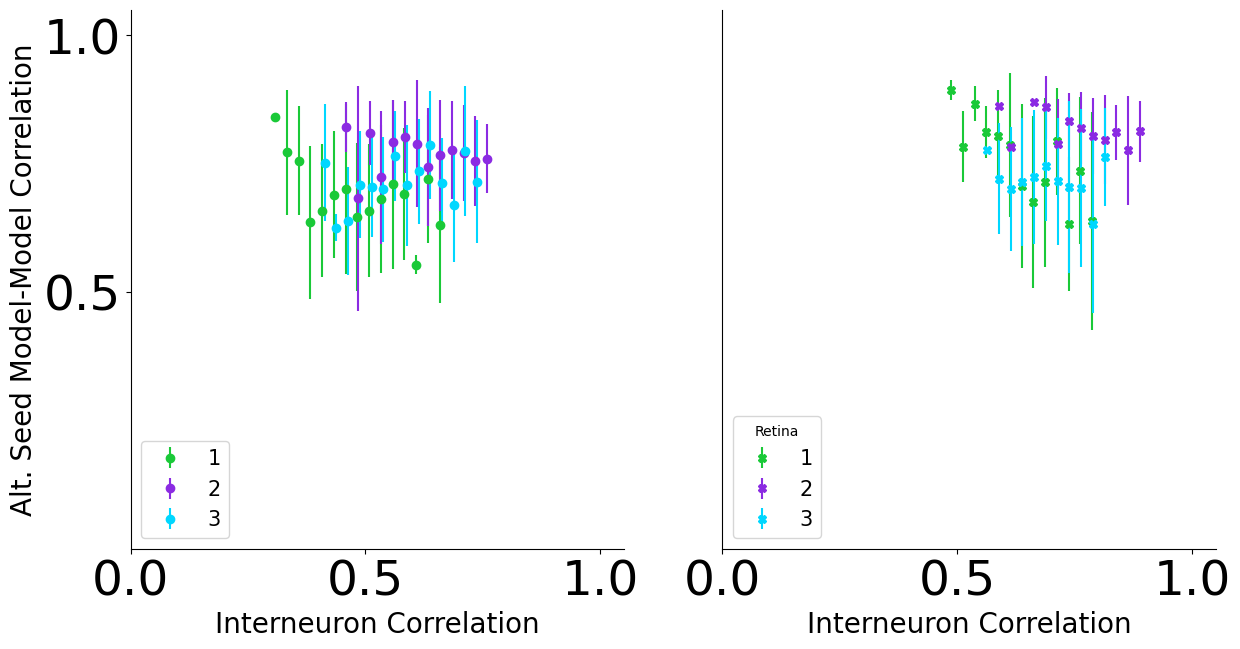

In [52]:
n_bins = 40
jitter = 0.01
bins = np.linspace(0,1,n_bins+1)[1:-1]
x_vals = np.linspace(0,1-bins[0],n_bins)+bins[0]/2

temp = cors.loc[(cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
means = dict()
errs = dict()
for retina in set(temp["Retina"]):
    t = temp.loc[temp["Retina"]==retina]
    mean, err = bin_mu_std(t["intr_cor"], t["cor"], bins)
    means[retina] = mean
    errs[retina] = err

fig, axs = plt.subplots(1,2,figsize=(14,7))

ax = axs[0]
plt.sca(ax)
for retina in means:
    x = x_vals + jitter*(np.random.random()-.5)
    plt.errorbar(x, means[retina], yerr=errs[retina], fmt='o', color=p[retina], label=retina)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Interneuron Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

temp = cors.loc[(cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
means = dict()
errs = dict()
for retina in set(temp["Retina"]):
    t = temp.loc[temp["Retina"]==retina]
    mean, err = bin_mu_std(t["intr_cor"], t["cor"], bins)
    means[retina] = mean
    errs[retina] = err

ax = axs[1]
plt.sca(ax)
for retina in means:
    x = x_vals + jitter*(np.random.random()-.5)
    plt.errorbar(x, means[retina], yerr=errs[retina], fmt='X', color=p[retina], label=retina)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.tick_params(axis='both', which='major', labelsize=35)
##temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Interneuron Correlation", fontsize=20)

plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(title="Retina", loc="lower left", fontsize=15)

plt.show()

434
457


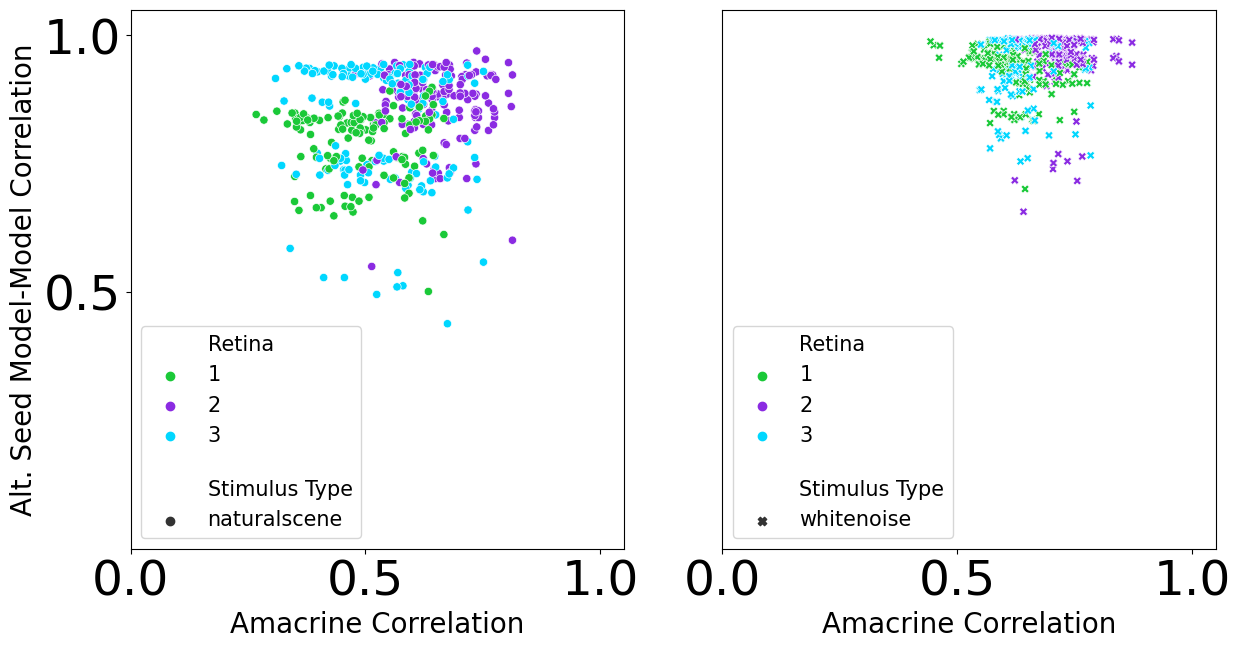

In [73]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = cors.loc[(cors["cell_type"]=="amacrine")&(cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Amacrine Correlation", fontsize=20)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = cors.loc[(cors["cell_type"]=="amacrine")&(cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Amacrine Correlation", fontsize=20)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.show()

81
96


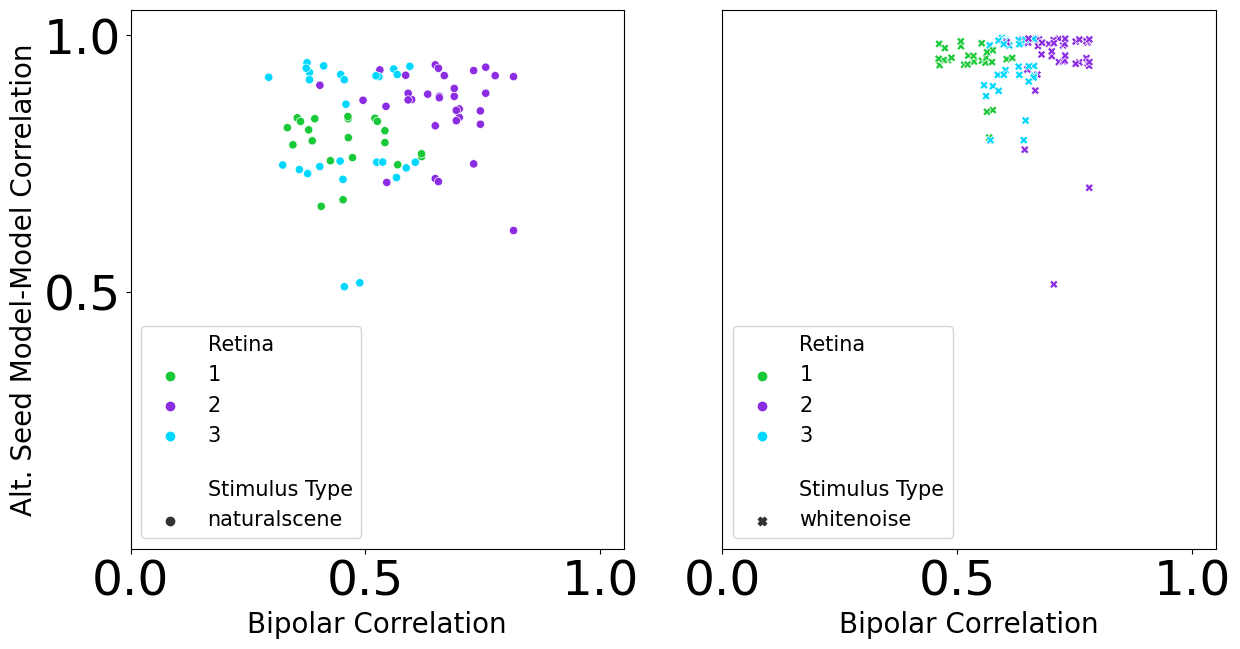

In [74]:
fig, axs = plt.subplots(1,2,figsize=(14,7))
ax = axs[0]
temp = cors.loc[(cors["cell_type"]=="bipolar")&(cors["stim_type1"]=="naturalscene")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Bipolar Correlation", fontsize=20)
plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

ax = axs[1]
temp = cors.loc[(cors["cell_type"]=="bipolar")&(cors["stim_type1"]=="whitenoise")].sort_values(by="Stimulus Type")
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="intr_cor", y="cor", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p, markers=marker_map)
ax.set_ylabel("",fontsize=1)
ax.set_xlabel("Bipolar Correlation", fontsize=20)

plt.sca(ax)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([])
plt.ylim([0, 1.05])
plt.legend(loc="lower left", fontsize=15)

plt.show()

In [10]:
cors = og_cors.loc[(~og_cors["model1"].isna())&(~og_cors["model2"].isna())]
cors = cors.reset_index()
cors = cors.merge(right=model_df, on="save_folder", how="inner")
cors["cell"] = "[0]"

cors["dataset"] =   cors.apply(lambda x: x.model1.split("dataset")[-1].split("_")[0], axis=1)
cors["stim_type"] = cors.apply(lambda x: x.model1.split("stim_type")[-1].split("_")[0], axis=1)
cors["datatype"] =  cors["dataset"]+cors["stim_type"]
cors["seed"] =      cors.apply(lambda x: x.model1.split("seed")[-1].split("_")[0], axis=1)

cors["dataset2"] = cors.apply(lambda x: x.model2.split("dataset")[-1].split("_")[0], axis=1)
cors["stim_type2"] = cors.apply(lambda x: x.model2.split("stim_type")[-1].split("_")[0], axis=1)
cors["datatype2"] = cors["dataset2"]+cors["stim_type2"]
cors["seed2"] = cors.apply(lambda x: x.model2.split("seed")[-1].split("_")[0], axis=1)

cors.loc[cors["is_intr"], "model_dataset"] = cors["dataset2"]
cors.loc[cors["is_intr"], "model_stim_type"] = cors["stim_type2"]
cors.loc[cors["is_intr"], "model_datatype"] = cors["datatype2"]
cors.loc[cors["is_intr"], "model_seed"] = cors["seed2"]
cors.loc[cors["is_intr"], "cell"] = cors.loc[cors["is_intr"]].apply(lambda x: x.model1.split("cells")[-1].split("_")[0], axis=1)

cors.loc[~cors["is_intr"], "model_dataset"] = cors["dataset"]
cors.loc[~cors["is_intr"], "model_stim_type"] = cors["stim_type"]
cors.loc[~cors["is_intr"], "model_datatype"] = cors["datatype"]
cors.loc[~cors["is_intr"], "model_seed"] = cors["seed"]

cors["cell"] = cors.apply(lambda x: x.cell[1:-1], axis=1).astype("int")
cors

,level_0,index,chan1,chan2,cor,cor_type,m1_layer,m2_layer,model1,model2,xy_coord,is_intr,save_folder,test_acc,cell,dataset,stim_type,datatype,seed,dataset2,stim_type2,datatype2,seed2,model_dataset,model_stim_type,model_datatype,model_seed
0,32,32,0,5,0.700854,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
1,33,33,1,5,0.767521,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
2,34,34,2,5,0.802463,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
3,35,35,3,5,0.730706,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
4,36,36,4,5,0.809689,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30715,31559,2759,0,7,0.439564,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_666_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,11,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30716,31618,2818,0,3,0.212656,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30717,31619,2819,0,1,0.420002,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30718,31678,2878,0,5,0.752270,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,13,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789


In [11]:
df1 = cors.loc[cors["is_intr"]]

# For each interneuron, get best correlated cell from each model
groups = ["model1", "model2"]
df1_maxes = df1.sort_values(by="cor", ascending=False).drop_duplicates(groups).reset_index(drop=True)
df1_maxes
#df1_maxes = 
#print("Maxes Len:", len(df1_maxes))
## Average over best correlations with each interneuron model of a particular type (i.e. bipolar, amacrine, unk..) 
#intr_avg = df1_maxes.groupby(["model1", "dataset", "stim_type", "m1_layer", "chan1", "dataset2", "stim_type2", "datatype2"]).mean().reset_index()
#print("Len:", len(intr_avg))
#intr_avg.head()

,level_0,index,chan1,chan2,cor,cor_type,m1_layer,m2_layer,model1,model2,xy_coord,is_intr,save_folder,test_acc,cell,dataset,stim_type,datatype,seed,dataset2,stim_type2,datatype2,seed2,model_dataset,model_stim_type,model_datatype,model_seed
0,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678
1,30340,1540,0,0,0.980709,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
2,30102,1302,0,7,0.980098,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_299_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.606012,9,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21b,whitenoise,15-11-21bwhitenoise,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,123456
3,30280,1480,0,0,0.978692,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_345_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,12,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
4,29310,510,0,2,0.978662,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_102_datasetbipolars_la...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,2,bipolars,intrnrns,bipolarsintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,30849,2049,0,0,0.223439,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_501_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.771839,0,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,naturalscene,15-11-21anaturalscene,123456,15-11-21a,naturalscene,15-11-21anaturalscene,123456
1436,30881,2081,0,5,0.219861,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_501_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,0,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
1437,31611,2811,0,1,0.210622,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.742831,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,naturalscene,15-11-21anaturalscene,345678,15-11-21a,naturalscene,15-11-21anaturalscene,345678
1438,31601,2801,0,5,0.196689,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567


In [14]:
print("Len DF:", len(df1_maxes))
print("Calculated Len:", len(set(df1["model1"]))*5*6)

Len DF: 1440
Calculated Len: 1440


In [15]:
df2 = cors.loc[~cors["is_intr"]]
df2 = df2.loc[(df2["datatype"]==df2["datatype2"])&(df2["seed"]!=df2["seed2"])]

# Get best correlation from each model copy over different seeds 
groups = ["model1", "dataset", "stim_type", "seed", "model2", "dataset2", "stim_type2", "seed2", "m1_layer", "chan1"]
df2_maxes = df2.sort_values(by="cor",ascending=False).drop_duplicates(groups).reset_index(drop=True)
print(len(df2_maxes))
## Average over best correlation from each model copy averaging over different seeds 
#model_avg = df2_maxes.groupby(["model1", "dataset", "stim_type", "seed", "model2", "m1_layer", "chan1"]).mean().reset_index()
#print(len(model_avg))
#model_avg.head()

#dataset = "15-10-07"
#stim_type = "naturalscene"
#groups = ["model1", "dataset", "stim_type", "seed", "model2", "dataset2", "stim_type2", "m1_layer", "chan1"]
#x = df2_maxes.loc[(df2_maxes["dataset"]==dataset)&(df2_maxes["stim_type"]==stim_type)&(df2_maxes["datatype"]==df2_maxes["datatype2"])&(~df2_maxes["intrnrn_comp"])&(df2_maxes["seed"]!=df2_maxes["seed2"])].groupby(groups).max().reset_index()
##x.groupby("model1").mean()
#len(x)

1920


In [16]:
print("Len DF:", len(df2_maxes))
print("Calculated Len:", len(set(df2["model1"]))*16*4)

Len DF: 1920
Calculated Len: 1920


In [27]:
wide_df = df1_maxes.merge(
    right=df2_maxes, how="left",
    left_on=["model2", "m2_layer", "chan2", "seed2"],
    right_on=["model1", "m1_layer", "chan1", "seed"]
).sort_values(by=["cor_x","cor_y"], ascending=False)#.drop_duplicates(["model1_x", "model2_x"])
wide_df

,level_0_x,index_x,chan1_x,chan2_x,cor_x,cor_type_x,m1_layer_x,m2_layer_x,model1_x,model2_x,xy_coord_x,is_intr_x,save_folder_x,test_acc_x,cell_x,dataset_x,stim_type_x,datatype_x,seed_x,dataset2_x,stim_type2_x,datatype2_x,seed2_x,model_dataset_x,model_stim_type_x,model_datatype_x,model_seed_x,level_0_y,index_y,chan1_y,chan2_y,cor_y,cor_type_y,m1_layer_y,m2_layer_y,model1_y,model2_y,xy_coord_y,is_intr_y,save_folder_y,test_acc_y,cell_y,dataset_y,stim_type_y,datatype_y,seed_y,dataset2_y,stim_type2_y,datatype2_y,seed2_y,model_dataset_y,model_stim_type_y,model_datatype_y,model_seed_y
0,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15042,15042,2,0,0.994181,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,345678
1,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,14562,14562,2,1,0.993406,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,567891,15-11-21a,whitenoise,15-11-21awhitenoise,345678
2,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,14754,14754,2,3,0.991436,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,456789,15-11-21a,whitenoise,15-11-21awhitenoise,345678
3,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15266,15266,2,4,0.988786,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,123456,15-11-21a,whitenoise,15-11-21awhitenoise,345678
4,30340,1540,0,0,0.980709,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenois

In [29]:
print("Len DF:", len(wide_df))
print(len(set(df1_maxes["model2"])))
print(len(set(df1_maxes["model1"])))
print("Calculated Len:", len(set(df1_maxes["model2"]))*len(set(df1_maxes["model1"]))*4)

Len DF: 5760
30
48
Calculated Len: 5760


In [30]:
retina_map = {
    "15-10-07": 1,
    "15-11-21a": 2,
    "15-11-21b": 3,
}
wide_df["\nRetina"] = wide_df.apply(lambda x: retina_map[x.model_dataset_x], axis=1)
wide_df["\nStimulus Type"] = wide_df["model_stim_type_x"]
wide_df["Retina"] = wide_df.apply(lambda x: retina_map[x.model_dataset_x], axis=1)
wide_df["Stimulus Type"] = wide_df["model_stim_type_x"]

colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

In [31]:
len(set(df1_maxes.loc[df1_maxes["dataset"]=="bipolars"]["model1"]))

7

3240


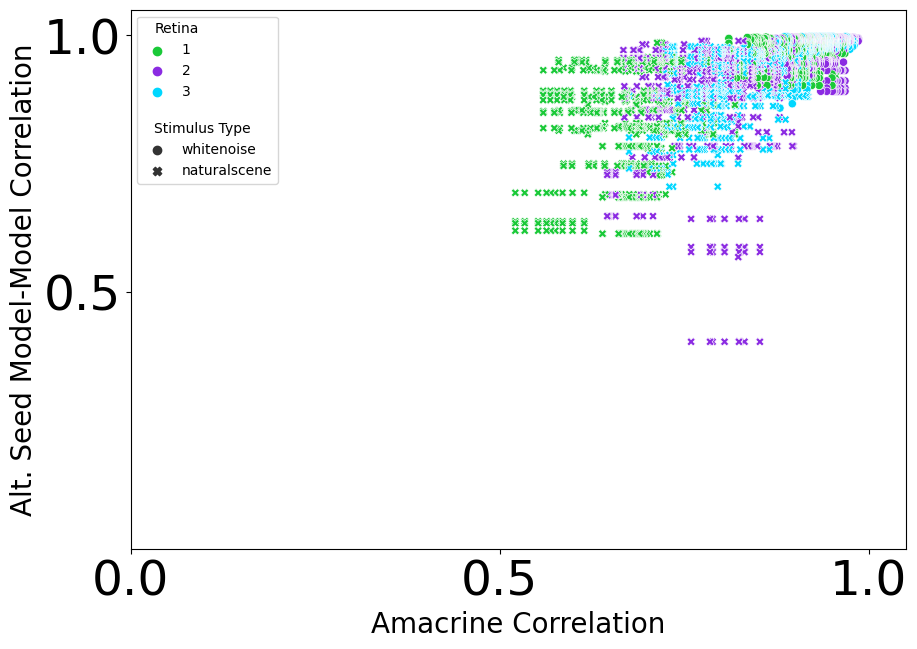

In [39]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="amacrines"]
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

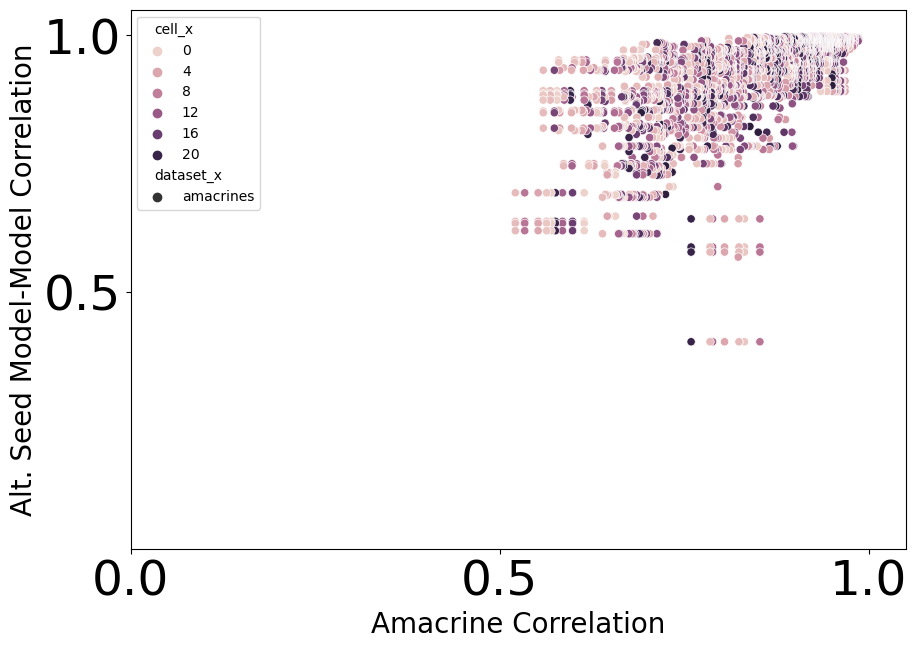

In [40]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="amacrines"]
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="dataset_x", hue="cell_x", data=temp, ax=ax)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

The issue we're seeing is because multiple amacrine cells maximally correlate with the same model cell. This is partially by design because we're looking at correlations from 16 model cells to all of the different interneurons. This should be fixed soon.

840


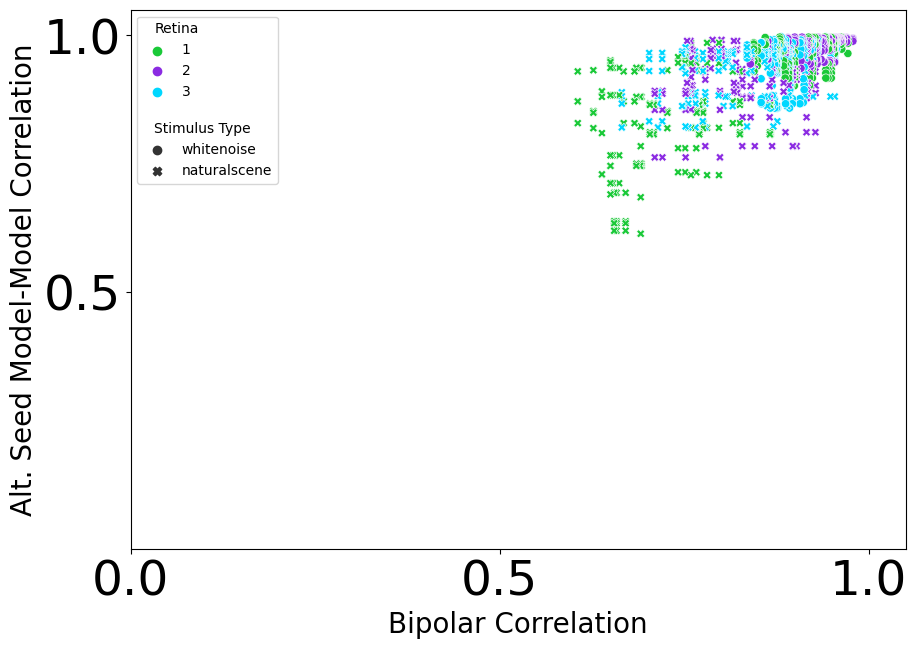

In [42]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="bipolars"]
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Bipolar Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

## Avg Model Interneuron Figures

In [ ]:
df["model1"] = df["save_folder"]
cors = og_cors.merge(right=df, on="model1", how="inner")
del df["model1"]
df["model2"] = df["save_folder"]
cors = cors.merge(right=df, on="model2", how="inner")
cors = cors.loc[(cors["test_acc_x"]>.5)&(cors["test_acc_y"]>.5)]
cors

In [18]:
temp = cors.loc[(cors["dataset_x"]==cors["dataset_y"])&(cors["stim_type_x"]==cors["stim_type_y"])&(cors["seed_x"]!=cors["seed_y"])]
avg_over_seeds = temp.groupby(["model1", "dataset_x", "stim_type_x", "seed_x", "chan1", "m1_layer"]).mean().reset_index()
avg_over_seeds.head()

,model1,dataset_x,stim_type_x,seed_x,chan1,m1_layer,chan2,cor,test_acc_x,amacrine_intr_cor_x,bipolar_intr_cor_x,unk_intr_cor_x,seed_y,test_acc_y,amacrine_intr_cor_y,bipolar_intr_cor_y,unk_intr_cor_y
0,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,0,sequential.0,NaN,0.706493,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
1,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,0,sequential.4,NaN,0.449627,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
2,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,1,sequential.0,NaN,0.768216,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
3,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,1,sequential.4,NaN,0.322334,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
4,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,2,sequential.0,NaN,0.554486,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676


In [21]:
retina_map = {
    "15-10-07": 1,
    "15-11-21a": 2,
    "15-11-21b": 3,
}
avg_over_seeds["\nRetina"] = avg_over_seeds.apply(lambda x: retina_map[x.dataset_x], axis=1)
avg_over_seeds["\nStimulus Type"] = avg_over_seeds["stim_type_x"]
avg_over_seeds["Retina"] = avg_over_seeds.apply(lambda x: retina_map[x.dataset_x], axis=1)
avg_over_seeds["Stimulus Type"] = avg_over_seeds["stim_type_x"]

In [26]:
colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

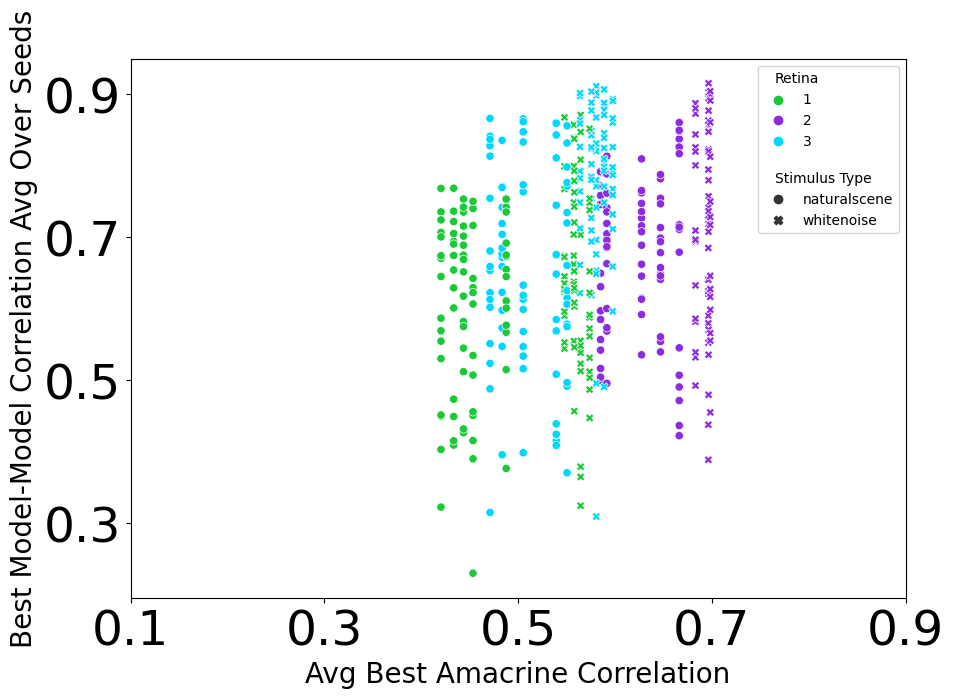

In [31]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
sns.scatterplot(x="amacrine_intr_cor_x", y="cor", style="\nStimulus Type", hue="Retina", data=avg_over_seeds, ax=ax, palette=p)
ax.set_ylabel("Best Model-Model Correlation Avg Over Seeds", fontsize=20)
ax.set_xlabel("Avg Best Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(1,10,2)],fontsize=35)
plt.yticks([i*0.1 for i in range(3,10,2)],fontsize=35)
plt.show()

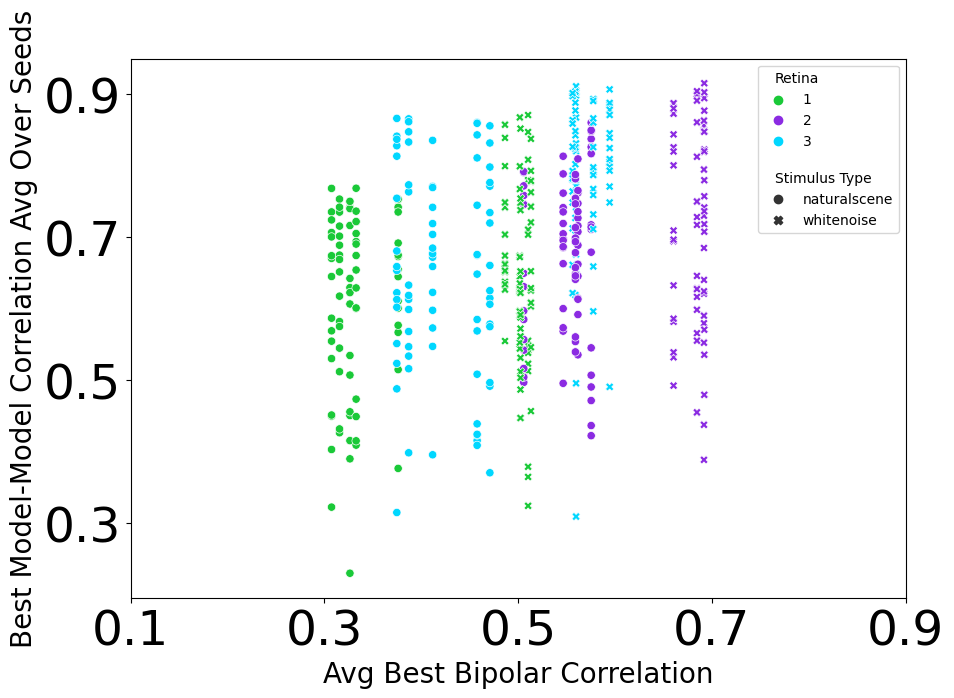

In [32]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
sns.scatterplot(x="bipolar_intr_cor_x", y="cor", style="\nStimulus Type", hue="Retina", data=avg_over_seeds, ax=ax, palette=p)
ax.set_ylabel("Best Model-Model Correlation Avg Over Seeds", fontsize=20)
ax.set_xlabel("Avg Best Bipolar Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(1,10,2)],fontsize=35)
plt.yticks([i*0.1 for i in range(3,10,2)],fontsize=35)
plt.show()

## Convgc Histogram

(array([  82.,  416.,  884., 1044., 1528., 1729., 1328., 1210.,  633.,
         168.]),
 array([-0.87996775, -0.70589477, -0.5318218 , -0.35774882, -0.18367585,
        -0.00960287,  0.1644701 ,  0.33854308,  0.51261605,  0.68668903,
         0.860762  ]),
 <a list of 10 Patch objects>)

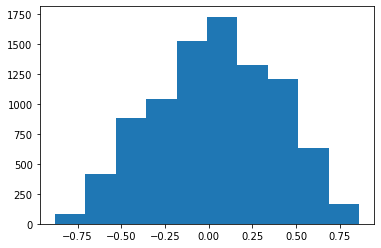

In [63]:
conv_df = conv_cors.loc[conv_cors['model1']!=conv_cors['model2']]
plt.hist(conv_df['cor'])

## Intr to Conv Prep

In [64]:
stim = tdr.stimuli.repeat_white(5000,nx=50,rand_spat=True)
stim = tdr.stimuli.rolling_window(stim,40)

conv_folders = []
datasets = ['15-10-07','15-11-21a','15-11-21b']
stim_types = ['naturalscene','whitenoise']
pre = os.path.join(prepath.split("training_scripts")[0],"models")
for dataset in datasets:
    for stim_type in stim_types:
        name = "convgc_{}_{}.pt".format(dataset,stim_type)
        conv_folders.append(name)
        
table = {
    "conv_model":[],
    "intr_model":[],
    "conv_row":[],
    "conv_col":[],
    "conv_layer":[],
    "conv_chan":[],
    "intr_row":[],
    "intr_col":[],
    "intr_layer":[],
    "intr_chan":[],
    "cor":[],
}

for i in range(len(intr_folders)):
    intr_sf = intr_folders[i]
    path = os.path.join(prepath,intr_sf)
    m1 = tdr.io.load_model(path)
    m1.eval()
    m1.cuda()
    m1.tile_output(True)
    resp1 = tdr.utils.inspect(m1,stim,to_numpy=True)['outputs']
    m1.cpu()
    intr_row, intr_col = int(resp1.shape[-2]//2), int(resp1.shape[-1]//2)
    resp1 = resp1[..., intr_row,intr_col]
    for j in tqdm.tqdm(range(len(conv_folders))):
        conv_sf = conv_folders[j]
        path = os.path.join(pre,conv_sf)
        m2 = tdr.io.load_model(path)
        m2.eval()
        m2.cuda()
        m2.tile_output(True)
        layers = tdr.utils.get_conv_layer_names(m2)[:-1]
        response = tdr.utils.inspect(m2,stim,insp_keys=layers,to_numpy=True)
        m2.cpu()
        for layer in layers:
            resp2 = response[layer]
            chans,height,width = resp2.shape[1:]
            cor_mtx = tdr.utils.mtx_cor(resp1,resp2,to_numpy=True)
            cor_mtx = cor_mtx.reshape(len(cor_mtx),chans,-1)
            argmaxs = np.argmax(cor_mtx[0],axis=-1)
            locs = list(zip(*np.unravel_index(argmaxs,(height,width)))) # list of row,col for each chan
            cor_mtx = cor_mtx.reshape(len(cor_mtx),chans,height,width)
            for chan in range(len(locs)):
                table["conv_model"].append(conv_sf)
                table["intr_model"].append(intr_sf)
                row,col = locs[chan]
                table["conv_row"].append(row)
                table["conv_col"].append(col)
                table["conv_layer"].append(layer)
                table["conv_chan"].append(chan)
                table["intr_row"].append(intr_row)
                table["intr_col"].append(intr_col)
                table["intr_layer"].append("output")
                table["intr_chan"].append(0)
                table["cor"].append(cor_mtx[0,chan,row,col])

cross_cors = pd.DataFrame(table)
cross_cors
    

100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


,conv_model,intr_model,conv_row,conv_col,conv_layer,conv_chan,intr_row,intr_col,intr_layer,intr_chan,cor
0,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,22,32,sequential.0,0,22,22,output,0,0.120696
1,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,35,21,sequential.0,1,22,22,output,0,0.129211
2,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,19,20,sequential.0,2,22,22,output,0,0.585998
3,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,18,18,sequential.0,3,22,22,output,0,0.279902
4,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,30,19,sequential.0,4,22,22,output,0,0.123152
...,...,...,...,...,...,...,...,...,...,...,...
2875,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,15,3,sequential.4,3,22,22,output,0,0.145450
2876,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,4,18,sequential.4,4,22,22,output,0,0.104602
2877,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,16,25,sequential.4,5,22,22,output,0,0.559756
2878,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,14,23,sequential.4,6,22,22,output,0,0.531210


## Intr to Model All

(array([1113.,  303.,  212.,  202.,  285.,  258.,  267.,  165.,   66.,
           9.]),
 array([0.05865389, 0.13616503, 0.21367618, 0.29118732, 0.36869846,
        0.44620961, 0.52372075, 0.6012319 , 0.67874304, 0.75625418,
        0.83376533]),
 <a list of 10 Patch objects>)

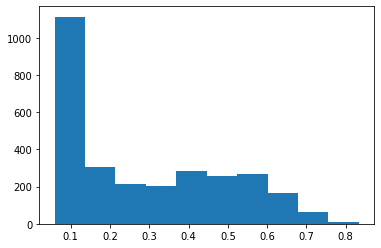

In [65]:
plt.hist(cross_cors['cor'])

## Intr to Model Bests

(array([ 2.,  5.,  7.,  9., 23., 21., 46., 38., 23.,  6.]),
 array([0.14399412, 0.21297124, 0.28194836, 0.35092548, 0.4199026 ,
        0.48887973, 0.55785685, 0.62683397, 0.69581109, 0.76478821,
        0.83376533]),
 <a list of 10 Patch objects>)

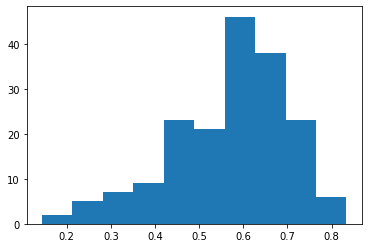

In [66]:
dups = ['conv_model','intr_model']
cross_bests = cross_cors.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(cross_bests['cor'])

## All Together

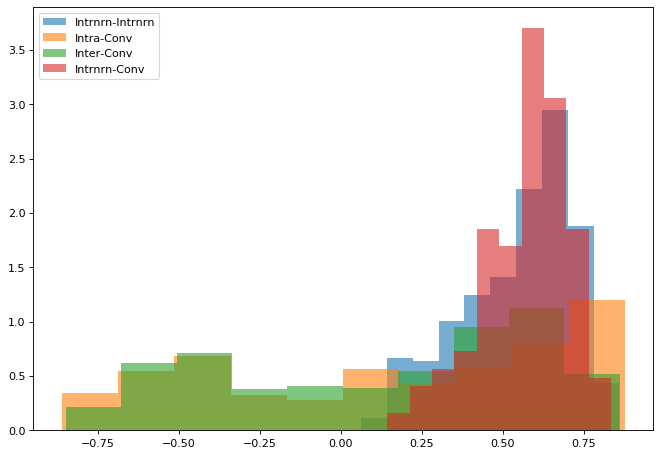

In [74]:
layers = {'sequential.0','sequential.4'}
same_layer = False
intr_bests = False
fig = plt.figure(figsize=(10,7),dpi=80)

if intr_bests:
    intr_cors['model'] = intr_cors['model1']
    temp = intr_cors
    intr_cors['model'] = intr_cors['model2']
    temp = temp.append(intr_cors)
    temp = intr_cors.sort_values(by="cor",ascending=False).drop_duplicates(["model"])
else:
    temp = intr_cors
plt.hist(temp['cor'],alpha=0.6,label="Intrnrn-Intrnrn",density=True)

conv_df = conv_cors.loc[conv_cors['model1']==conv_cors['model2']]
conv_df = conv_df.loc[conv_df['m1_layer'].isin(layers)&conv_df['m2_layer'].isin(layers)]
if same_layer:
    conv_df = conv_df.loc[conv_df['m1_layer']==conv_df['m2_layer']]
conv_df = conv_df.loc[conv_df['chan1']!=conv_df['chan2']]
# dups = ['model1','model2']
# conv_df = conv_df.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(conv_df['cor'],alpha=0.6,label="Intra-Conv",density=True)

conv_df = conv_cors.loc[(conv_cors['model1']!=conv_cors['model2'])]
conv_df = conv_df.loc[conv_df['m1_layer'].isin(layers)&conv_df['m2_layer'].isin(layers)]
if same_layer:
    conv_df = conv_df.loc[conv_df['m1_layer']==conv_df['m2_layer']]
dups = ['model1','model2','chan1','chan2']
conv_df = conv_df.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(conv_df['cor'],alpha=0.6,label="Inter-Conv",density=True)

plt.hist(cross_bests['cor'],alpha=0.6,label="Intrnrn-Conv",density=True)

plt.legend()
plt.show()